In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("larger_data_m31.csv")

In [3]:
mask = list()
used_keys = list()
for i,itm in enumerate(data["Identifier"]):
    if len(used_keys)==0:
        mask.append(i)
        used_keys.append(itm)
    else:
        truth_token = True
        for ix,itmx in enumerate(used_keys):
            if itmx == itm:
                truth_token = False
        if truth_token:
            mask.append(i)
            used_keys.append(itm)


In [4]:
v_mag_unproc = data["Mag V"][mask]
b_mag_unproc = data["Mag B"][mask]
#removing any NaN values 
mask_v = list()
for i,itm in enumerate(v_mag_unproc):
    mask_v.append(itm > 0)
mask_b = list()
for i,itm in enumerate(b_mag_unproc):
    mask_b.append(itm > 0)

#Mixing them together
mask_both = list()
for i,itm_b, in enumerate(mask_b):
    itm_v = mask_v[i]
    if itm_b == itm_v:
        mask_both.append(itm_b)
    else:
        mask_both.append(False)
#Final product
v_band = v_mag_unproc[mask_both]
b_band = b_mag_unproc[mask_both]

In [5]:
data.keys()

Index(['N', 'Identifier', 'dist(asec)', 'prob. member', 'link ref', 'Mag U',
       'Mag B', 'Mag V', 'Mag R', '#ref \n1850 - 2019'],
      dtype='object')

In [6]:
color = v_band- b_band

In [7]:
color

0      -0.980
6      -0.750
7      -1.350
11     -1.110
16     -1.000
19     -0.780
23     -1.000
32     -0.810
33     -0.770
35     -1.890
36     -1.820
38     -1.893
41     -0.451
42     -0.521
43     -0.499
44     -0.970
46     -0.958
47     -1.864
48     -0.380
49     -0.512
50     -1.882
51     -0.366
52     -0.720
54     -0.560
55     -1.677
56     -0.540
57     -0.127
58     -0.392
59     -0.392
60     -0.800
        ...  
9917    0.000
9918    0.000
9919   -0.100
9920   -0.200
9932   -0.100
9933    0.153
9936    0.000
9938    0.600
9939    0.000
9940    0.000
9941   -0.100
9942    0.100
9943    0.000
9944    0.000
9945   -0.434
9946   -0.500
9947   -0.680
9948   -1.150
9949   -0.460
9950    0.408
9952   -0.346
9953   -1.710
9955   -0.890
9961   -1.580
9969   -3.200
9970   -0.730
9971   -1.300
9973   -0.250
9974    1.810
9998   -0.410
Length: 4858, dtype: float64

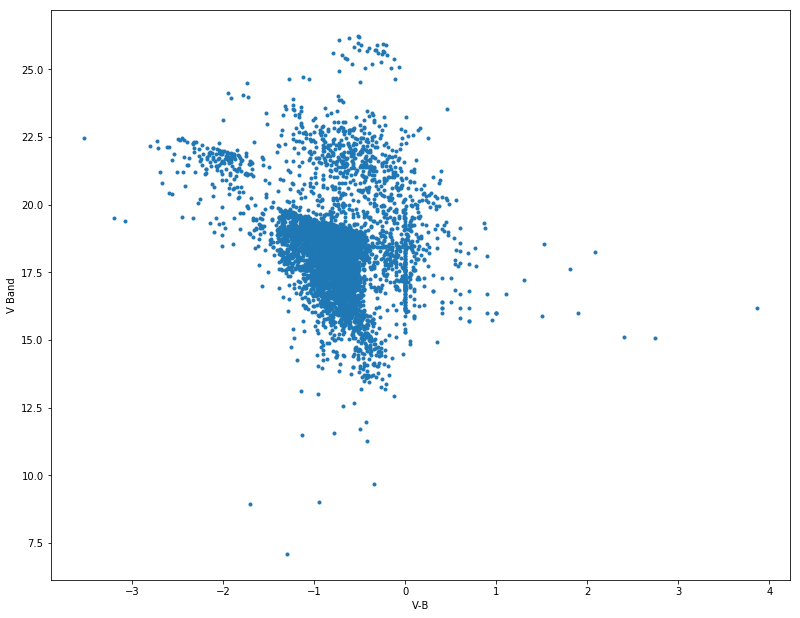

In [12]:
fig,ax = plt.subplots(1,1)                    
fig.set_size_inches(11,8.5)                   

fig.tight_layout()                            


ax.set_xlabel("V-B")
ax.set_ylabel("V Band")

ax.plot(color, b_band,marker="o",linestyle="None",markersize=3)